# Visualize files
- manhattan.geojson
- requests.csv
- vehicle_events.csv
- vehicle_events_pnas.csv
- vehicle_paths.csv
- vehicle_paths.zip
- vehicle_paths_pnas.csv

In [38]:
import os
import requests
import shapely
import json
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import itertools
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
%pylab inline
from fiona.crs import from_epsg

Populating the interactive namespace from numpy and matplotlib


# Requests

In [39]:
requestspd = pd.read_csv('requests.csv')

In [40]:
requestspd.head()

Timestamp  Requested_Pickup  Requested_Dropoff  Actual_Pickup  \
0  1380949200              1149                725            218   
1  1380949200              1225               1714           2003   
2  1380949200              1237               3143           1314   
3  1380949200              1323               3566           1330   
4  1380949200              1328               2466           1323   

   Actual_Dropoff  
0            3601  
1            3601  
2            2218  
3            2573  
4            2473

In [41]:
print(len(requestspd.Requested_Pickup.sort_values().unique()))
requestspd.Requested_Pickup.sort_values().unique()

3561


array([   0,    1,    2, ..., 4403, 4405, 4406])

In [42]:
print(len(requestspd.Actual_Dropoff.sort_values().unique()))
requestspd.Actual_Dropoff.sort_values().unique()

3749


array([  -1,    0,    1, ..., 4406, 4409, 4410])

# Vehicles

In [348]:
vehicle_eventspd = pd.read_csv('vehicle_events.csv')
vehicle_events_pnaspd = pd.read_csv('vehicle_events_pnas.csv')
vehicle_pathspd = pd.read_csv('vehicle_paths.csv')
vehicle_paths_pnaspd = pd.read_csv('vehicle_paths_pnas.csv')

In [349]:
# print(vehicle_events_pnaspd.Requested_Stop_Intersection.unique()vehicle_eventspd.head()

In [350]:
vehicle_eventspd.head()

Timestamp  Vehicle_ID  Stop_Intersection  Stop_Passengers  \
0  1380949200          83               2767                0   
1  1380949200          89               3070                0   
2  1380949200         112                 97                0   
3  1380949200         121                215                0   
4  1380949200         141               1314                0   

   Requested_Stop_Intersection  
0                         2764  
1                         1818  
2                          972  
3                          396  
4                         1237

In [351]:
print(len(vehicle_eventspd.Requested_Stop_Intersection.sort_values().unique()))
vehicle_eventspd.Requested_Stop_Intersection.sort_values().unique()

4134


array([  -1,    0,    1, ..., 4403, 4405, 4406])

In [352]:
vehicle_events_pnaspd.Requested_Stop_Intersection.unique()

array([ nan])

In [353]:
print(vehicle_pathspd.shape)
vehicle_pathspd.head()

(2643431, 5)


Timestamp  Vehicle_ID  Latitude  Longitude  Num_Passengers
0  1380949200          83  40.73062  -73.99065               0
1  1380949200          89  40.71429  -74.01153               0
2  1380949200         112  40.77178  -73.97919               0
3  1380949200         121  40.73974  -74.00249               0
4  1380949200         141  40.77114  -73.96392               0

In [354]:
vehicle_pathspd.Num_Passengers.unique()

array([0, 1, 2, 3, 4])

In [355]:
# vehicle_paths_pnaspd.head()
vehicle_paths_pnaspd.Num_Passengers.unique()

array([  0,   1,   2,   3,  -1,   4,   5,   6,   7,   8,   9,  10,  -2,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  62,  63,
        61,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101])

In [356]:
manhattan = gpd.read_file('manhattan.geojson')

In [357]:
manhattan.id.unique()


array([   0,    1,    2, ..., 9622, 9623, 9624])

id   w                                           geometry
0   0  11  LINESTRING (-73.9975944 40.7140611, -73.997492...
1   1  51  LINESTRING (-73.9975944 40.7140611, -73.998074...
2   2  14  LINESTRING (-73.9980743 40.7137811, -73.997981...
3   3  55  LINESTRING (-73.9980743 40.7137811, -73.998643...

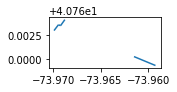

In [358]:
manhattan.iloc[5:9,:].plot(figsize=(2,2))
manhattan.head(4)

In [264]:
manhattan.geometry.length.head(4)

0    0.000121
1    0.000556
2    0.000143
3    0.000625
dtype: float64

# Problem 1

1. What is the serving rate for each scenario throughout the day, comparing to the overall serving rate? Serving rate is the number of successfully matched trip in a period of time. For example, is the serving rate higher in the rush hour or at night

In [54]:
# Successfull matched trup

In [55]:
# Calculate time of the day

In [56]:
requestspd['datetime'] = requestspd.Timestamp.astype('datetime64[s]')
requestspd['hour_of_timestamp'] = requestspd['datetime'].dt.hour

In [57]:
requestspd.tail()

Timestamp  Requested_Pickup  Requested_Dropoff  Actual_Pickup  \
383064  1381035597              1391               2536           1393   
383065  1381035597              1649               3209           1650   
383066  1381035597               450               3150             -1   
383067  1381035598              2682               2369             -1   
383068  1381035599               419               1391           4052   

        Actual_Dropoff            datetime  hour_of_timestamp  
383064            3993 2013-10-06 04:59:57                  4  
383065            3953 2013-10-06 04:59:57                  4  
383066              -1 2013-10-06 04:59:57                  4  
383067              -1 2013-10-06 04:59:58                  4  
383068            1396 2013-10-06 04:59:59                  4

In [58]:
requestspd['Successfull'] = requestspd.Actual_Pickup[requestspd.Actual_Pickup!=-1].apply(lambda x: 1)

In [59]:
# requestspd.Actual_Pickup[requestspd.Actual_Pickup==-1].apply(lambda x: -x)

In [60]:
requestspd.tail()

Timestamp  Requested_Pickup  Requested_Dropoff  Actual_Pickup  \
383064  1381035597              1391               2536           1393   
383065  1381035597              1649               3209           1650   
383066  1381035597               450               3150             -1   
383067  1381035598              2682               2369             -1   
383068  1381035599               419               1391           4052   

        Actual_Dropoff            datetime  hour_of_timestamp  Successfull  
383064            3993 2013-10-06 04:59:57                  4          1.0  
383065            3953 2013-10-06 04:59:57                  4          1.0  
383066              -1 2013-10-06 04:59:57                  4          NaN  
383067              -1 2013-10-06 04:59:58                  4          NaN  
383068            1396 2013-10-06 04:59:59                  4          1.0

In [61]:
requestspd_sorted = requestspd.groupby(by='hour_of_timestamp').count()

In [62]:
requestspd_sorted.tail()

Timestamp  Requested_Pickup  Requested_Dropoff  \
hour_of_timestamp                                                   
19                     19383             19383              19383   
20                     17988             17988              17988   
21                     14773             14773              14773   
22                     19137             19137              19137   
23                     25012             25012              25012   

                   Actual_Pickup  Actual_Dropoff  datetime  Successfull  
hour_of_timestamp                                                        
19                         19383           19383     19383         8991  
20                         17988           17988     17988         9365  
21                         14773           14773     14773         9531  
22                         19137           19137     19137         9145  
23                         25012           25012     25012         8638

In [63]:
requestspd_sorted['serving rate'] = requestspd_sorted.Successfull/requestspd_sorted.Actual_Pickup

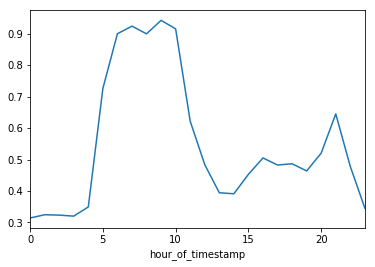

In [64]:
requestspd_sorted['serving rate'].plot()

In [65]:
# requestspd_sorted['serving rate'].to_csv('Q1_requestspd_sorted_serving rate.csv')

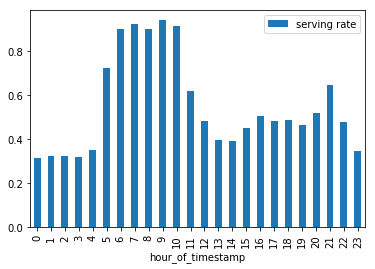

In [66]:
requestspd_sorted.reset_index().plot('hour_of_timestamp','serving rate',kind='bar')

# Problem 2

2.For  those  trips  thatcould  not  be  served,  do  they  follow  a  spatial  or  temporal  pattern?  For  example, are most of those trips originated in particular regions, and of certain times?

3.For  the  entire  simulation,  we  limit  vehicle  speed  to  under  25mph.  Could  you  see  any  vehicle  travel exceeded those limits? If so, could you show us where (and potentially how) that happen?

4.We also limit vehicle capacity to at most 4 passengers. Were there vehicles violating this condition? If so, can you show any pattern about these vehicles? For example, how many of them were violating, and where were they distributed in both time and space?

5.What  can  we  learn  about  the  vehicle  utilization?  Are  most  of  them  empty,  or  with  1,  2,  3  or  4 passengers?  Are  there  particular  vehicles  that  tend  to  ride  with  more  passengers  than  others?  If  so, how are they distributedin space and time.

# Problem 6
6.Are most vehicle moving or idling? In which part of the city that we see vehicle idling/moving more often?  For  example,  are  there  any  “dead  zone”  where  a  vehicle  just  drops  off  passengers,  and  stay idling forever?

In [67]:
## Analyzing speed

In [68]:
vehicle_pathspd['lonlat'] = list(zip(vehicle_pathspd.Longitude, vehicle_pathspd.Latitude))

In [69]:
len(vehicle_pathspd['lonlat'])

2643431

In [70]:
vehicle_pathspd['geometry'] = vehicle_pathspd[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [71]:
# vehicle_pathspd[vehicle_pathspd.Vehicle_ID==83]

In [72]:
vehicle_paths_gdp = gpd.GeoDataFrame(vehicle_pathspd)


In [73]:
len(vehicle_pathspd.Vehicle_ID.unique())
vehicle_pathspd.crs = from_epsg(4326)

In [273]:
vehicle_pathspd.crs

{'init': 'epsg:4326', 'no_defs': True}

In [75]:
# vehicle_pathspd['datetime'] = vehicle_pathspd.Timestamp.astype('datetime64[s]')
# vehicle_pathspd['sec_of_timestamp'] = vehicle_pathspd['datetime'].dt.second
# vehicle_pathspd.tail()

In [76]:
# Test algo for vehicle 83


In [77]:
# print(vehicle_pathspd_83.shape)
# vehicle_pathspd_83.tail(1)

In [78]:
# vehicle_pathspd_83.Timestamp.iloc[-1]

In [79]:
vehicle_pathspd['Time'] = np.nan

In [80]:
vehicle_pathspd.head()

Timestamp  Vehicle_ID  Latitude  Longitude  Num_Passengers  \
0  1380949200          83  40.73062  -73.99065               0   
1  1380949200          89  40.71429  -74.01153               0   
2  1380949200         112  40.77178  -73.97919               0   
3  1380949200         121  40.73974  -74.00249               0   
4  1380949200         141  40.77114  -73.96392               0   

                  lonlat                                      geometry  Time  
0  (-73.99065, 40.73062)                    POINT (-73.99065 40.73062)   NaN  
1  (-74.01153, 40.71429)  POINT (-74.01153000000001 40.71429000000001)   NaN  
2  (-73.97919, 40.77178)                    POINT (-73.97919 40.77178)   NaN  
3  (-74.00249, 40.73974)           POINT (-74.00249000000001 40.73974)   NaN  
4  (-73.96392, 40.77114)                    POINT (-73.96392 40.77114)   NaN

In [81]:
vehicle_pathspd[vehicle_pathspd.Vehicle_ID==83][::5].index

Int64Index([      0,    4084,    4089,    6126,    7644,    8020,   10851,
              10856,   17365,   17370,
            ...
            2612540, 2612545, 2612550, 2612555, 2612560, 2612565, 2612570,
            2612575, 2612580, 2612585],
           dtype='int64', length=1330)

In [82]:
# vehicle_pathspd_shortpervehicle = vehicle_pathspd[vehicle_pathspd.Vehicle_ID==83][::5]
# vehicle_pathspd_shortpervehicle

In [83]:
index = 2612585

In [84]:
# vehicle_pathspd_shortpervehicle = vehicle_pathspd[vehicle_pathspd.Vehicle_ID==83][::5]
# # vehicle_pathspd_shortpervehicle
vehicle_pathspd[::5].shape

(528687, 8)

In [85]:
vehicle_pathspd_short = pd.DataFrame()

for i, vehicle in enumerate(vehicle_pathspd.Vehicle_ID.sort_values().unique()):

    # Populate dataframe
    cols = ['Timestamp','Vehicle_ID','geometry']
    vehicle_pathspd_shortpervehicle = vehicle_pathspd.loc[:,cols][vehicle_pathspd.Vehicle_ID==vehicle][::5]
    if i%50 == 0:
        print(str(round(i/len(vehicle_pathspd.Vehicle_ID.sort_values().unique())*100,2))+\
                   '\n ------------------------------------------------------------')
        print('vehicle ID'+str(vehicle))
        print('len vehicle: '+str(len(vehicle_pathspd_shortpervehicle)))
#     vehicle_pathspd_short.loc[:,'Time']
    vehicle_pathspd_short = pd.concat([vehicle_pathspd_shortpervehicle, vehicle_pathspd_short])
#     vehicle_pathspd_short.loc[index,'geometry'] = vehicle_pathspd_shortpervehicle.geometry.iloc[k]
#     vehicle_pathspd_short.loc[index,'Timestamp'] = vehicle_pathspd_shortpervehicle.Timestamp.iloc[k]
vehicle_pathspd_short

0.0
 ------------------------------------------------------------
vehicle ID0
len vehicle: 1263
10.64
 ------------------------------------------------------------
vehicle ID52
len vehicle: 186
21.28
 ------------------------------------------------------------
vehicle ID106
len vehicle: 1329
31.91
 ------------------------------------------------------------
vehicle ID160
len vehicle: 1193
42.55
 ------------------------------------------------------------
vehicle ID215
len vehicle: 1313
53.19
 ------------------------------------------------------------
vehicle ID271
len vehicle: 143
63.83
 ------------------------------------------------------------
vehicle ID321
len vehicle: 1266
74.47
 ------------------------------------------------------------
vehicle ID373
len vehicle: 95
85.11
 ------------------------------------------------------------
vehicle ID423
len vehicle: 1124
95.74
 ------------------------------------------------------------
vehicle ID479
len vehicle: 91


Timestamp  Vehicle_ID                                      geometry
1742     1380949315         498           POINT (-73.97681999999999 40.74351)
1747     1380949372         498                    POINT (-73.97859 40.74505)
1752     1380949423         498           POINT (-73.97624999999999 40.74823)
4598     1380949494         498                    POINT (-73.97319 40.74694)
4603     1380949532         498                    POINT (-73.97539 40.74544)
4608     1380949581         498           POINT (-73.97773000000001 40.74228)
6688     1380949646         498                    POINT (-73.97905 40.74444)
6693     1380949695         498  POINT (-73.97669999999999 40.74760999999999)
12108    1380949744         498           POINT (-73.97440999999999 40.75076)
12113    1380949793         498                    POINT (-73.97211 40.75392)
12118    1380949842         498                    POINT (-73.96983 40.75706)
12123    1380949891         498                    POINT (-73.96754 40.76026)
20805    1380949940         498                    POINT (-73.96521 40.76343)
20810    1380949979         498                    POINT (-73.96339 40.76593)
20815    1380950028         498                     POINT (-73.9611 40.76906)
20820    1380950078         498                    POINT (-73.95871 40.77234)
20825    1380950163         498                    POINT (-73.95268 40.77234)
20830    1380950213         498           POINT (-73.95033000000001 40.77556)
26803    1380950311         498                    POINT (-73.94712 40.77593)
26808    1380950395         498                    POINT (-73.95034 40.77981)
31596    1380950486         498                    POINT (-73.95075 40.78327)
36933    1380950588         498           POINT (-73.95234000000001 40.78394)
36938    1380950637         498           POINT (-73.95463000000001 40.78079)
36943    1380950687         498                    POINT (-73.95701 40.77755)
39557    1380950738         498                    POINT (-73.95939 40.77428)
39562    1380950788         498                     POINT (-73.96171 40.7711)
63760    1380950838         498           POINT (-73.96406999999999 40.76786)
63765    1380950887         498           POINT (-73.96635999999999 40.76473)
63770    1380950935         498           POINT (-73.96864000000001 40.76163)
63775    1380950986         498                    POINT (-73.97099 40.75837)
...             ...         ...                                           ...
2595427  1381035250           0                    POINT (-73.96471 40.79167)
2599537  1381035353           0                    POINT (-73.97075 40.79592)
2599542  1381035402           0           POINT (-73.96845999999999 40.79906)
2601485  1381035448           0                    POINT (-73.96791 40.80225)
2606086  1381035532           0                    POINT (-73.96338 40.79857)
2606091  1381035607           0                    POINT (-73.96865 40.79914)
2606096  1381035655           0             POINT (-73.97091999999999 40.796)
2606101  1381035705           0           POINT (-73.97329999999999 40.79277)
2606106  1381035754           0                     POINT (-73.9756 40.78962)
2606111  1381035805           0           POINT (-73.97816999999999 40.78647)
2606116  1381035855           0                    POINT (-73.98058 40.78321)
2606121  1381035906           0            POINT (-73.98184999999999 40.7796)
2606126  1381035961           0                    POINT (-73.98228 40.77555)
2606131  1381036015           0           POINT (-73.98296999999999 40.77174)
2606136  1381036064           0                    POINT (-73.98523 40.76858)
2606141  1381036114           0           POINT (-73.98756999999999 40.76537)
2606146  1381036163           0           POINT (-73.98985999999999 40.76223)
2606151  1381036211           0            POINT (-73.99214000000001 40.7591)
2606156  1381036261           0           POINT (-73.99446999999999 40.75591)
2606161  1381036300           0 

In [86]:
len(vehicle_pathspd.Vehicle_ID.sort_values().unique())

470

In [87]:
for i, vehicle in enumerate(vehicle_pathspd.Vehicle_ID.sort_values().unique()):
    if i%50 == 0:
        print(str(round(i/len(vehicle_pathspd.Vehicle_ID.sort_values().unique())*100,2))+\
                   '\n ------------------------------------------------------------')
        print('vehicle ID'+str(vehicle))
        print('len vehicle: '+str(len(vehicle_pathspd_shortpervehicle)))
    vehicle_pathspd_shortpervehicle = vehicle_pathspd.loc[:,cols][vehicle_pathspd.Vehicle_ID==vehicle][::5]
    for k, index in enumerate(vehicle_pathspd_shortpervehicle.index):
        if k==0:
            continue
        if k%1000 == 0:
            print(round(k/len(vehicle_pathspd_shortpervehicle)*100,2))
            print('index',index)
        vehicle_pathspd_short.loc[index,'Time'] = vehicle_pathspd_shortpervehicle.Timestamp.iloc[k]- vehicle_pathspd_shortpervehicle.Timestamp.iloc[k-1]
vehicle_pathspd_short

0.0
 ------------------------------------------------------------
vehicle ID0
len vehicle: 1115
79.18
index 2113448
73.91
index 1929933
72.57
index 1880297
71.07
index 1806666
76.8
index 2024706
76.75
index 1988264
88.97
index 2367092
71.28
index 1768899
80.39
index 2108483
73.58
index 1907855
84.03
index 2228991
78.93
index 2073723
84.67
index 2233173
89.13
index 2400058
82.1
index 2149805
72.62
index 1865431
75.47
index 1875852
80.52
index 2140240
67.7
index 1651813
70.82
index 1809039
68.31
index 1678680
68.07
index 1671516
70.52
index 1757469
78.31
index 2059630
86.13
index 2307117
83.4
index 2178467
84.32
index 2266580
73.31
index 1880406
71.58
index 1758672
84.6
index 2311926
93.02
index 2487370
69.2
index 1699240
72.57
index 1833511
71.53
index 1776615
81.1
index 2178785
70.92
index 1782836
95.88
index 2583752
79.3
index 2088522
89.21
index 2367289
69.49
index 1692116
77.76
index 1995461
99.11
index 2610168
10.64
 ------------------------------------------------------------
vehi

97.85
index 2594545
89.37
index 2381014
87.57
index 2374360
91.24
index 2475050
75.08
index 1871054
83.13
index 2190813
71.74
index 1846025
83.4
index 2239260
89.69
index 2366296


Timestamp  Vehicle_ID                                      geometry  \
1742     1380949315         498           POINT (-73.97681999999999 40.74351)   
1747     1380949372         498                    POINT (-73.97859 40.74505)   
1752     1380949423         498           POINT (-73.97624999999999 40.74823)   
4598     1380949494         498                    POINT (-73.97319 40.74694)   
4603     1380949532         498                    POINT (-73.97539 40.74544)   
4608     1380949581         498           POINT (-73.97773000000001 40.74228)   
6688     1380949646         498                    POINT (-73.97905 40.74444)   
6693     1380949695         498  POINT (-73.97669999999999 40.74760999999999)   
12108    1380949744         498           POINT (-73.97440999999999 40.75076)   
12113    1380949793         498                    POINT (-73.97211 40.75392)   
12118    1380949842         498                    POINT (-73.96983 40.75706)   
12123    1380949891         498                    POINT (-73.96754 40.76026)   
20805    1380949940         498                    POINT (-73.96521 40.76343)   
20810    1380949979         498                    POINT (-73.96339 40.76593)   
20815    1380950028         498                     POINT (-73.9611 40.76906)   
20820    1380950078         498                    POINT (-73.95871 40.77234)   
20825    1380950163         498                    POINT (-73.95268 40.77234)   
20830    1380950213         498           POINT (-73.95033000000001 40.77556)   
26803    1380950311         498                    POINT (-73.94712 40.77593)   
26808    1380950395         498                    POINT (-73.95034 40.77981)   
31596    1380950486         498                    POINT (-73.95075 40.78327)   
36933    1380950588         498           POINT (-73.95234000000001 40.78394)   
36938    1380950637         498           POINT (-73.95463000000001 40.78079)   
36943    1380950687         498                    POINT (-73.95701 40.77755)   
39557    1380950738         498                    POINT (-73.95939 40.77428)   
39562    1380950788         498                     POINT (-73.96171 40.7711)   
63760    1380950838         498           POINT (-73.96406999999999 40.76786)   
63765    1380950887         498           POINT (-73.96635999999999 40.76473)   
63770    1380950935         498           POINT (-73.96864000000001 40.76163)   
63775    1380950986         498                    POINT (-73.97099 40.75837)   
...             ...         ...                                           ...   
2595427  1381035250           0                    POINT (-73.96471 40.79167)   
2599537  1381035353           0                    POINT (-73.97075 40.79592)   
2599542  1381035402           0           POINT (-73.96845999999999 40.79906)   
2601485  1381035448           0                    POINT (-73.96791 40.80225)   
2606086  1381035532           0                    POINT (-73.96338 40.79857)   
2606091  1381035607           0                    POINT (-73.96865 40.79914)   
2606096  1381035655           0             POINT (-73.97091999999999 40.796)   
2606101  1381035705           0           POINT (-73.97329999999999 40.79277)   
2606106  1381035754           0                     POINT (-73.9756 40.78962)   
2606111  1381035805           0           POINT (-73.97816999999999 40.78647)   
2606116  1381035855           0                    POINT (-73.98058 40.78321)   
2606121  1381035906           0            POINT (-73.98184999999999 40.7796)   
2606126  1381035961           0                    POINT (-73.98228 40.77555)   
2606131  1381036015           0           POINT (-73.98296999999999 40.77174)   
2606136  1381036064           0                    POINT (-73.98523 40.76858)   
2606141  1381036114           0           POINT (-73.98756999999999 40.76537)   
2606146  1381036163           0           POINT (-73.98985999999999 40.76223)   
2606151  1381036211           0          

In [88]:
# vehicle_pathspd_83['Time'].iloc[0] = None
vehicle_pathspd_short['Time'].iloc[-1]

49.0

In [89]:
# vehicle_pathspd_83['Time']
vehicle_pathspd_short.Timestamp.iloc[0]- vehicle_pathspd_short.Timestamp.iloc[-1]

-87400

In [90]:
# vehicle_pathspd_short.head()

In [91]:
# vehicle_pathspd_83.geometry.iloc[0]

In [92]:
for i, vehicle in enumerate(vehicle_pathspd.Vehicle_ID.sort_values().unique()):
    if i%50 == 0:
        print(str(round(i/len(vehicle_pathspd.Vehicle_ID.sort_values().unique())*100,2))+\
                   '\n ------------------------------------------------------------')
        print('vehicle ID'+str(vehicle))
        print('len vehicle: '+str(len(vehicle_pathspd_shortpervehicle)))
    vehicle_pathspd_shortpervehicle = vehicle_pathspd.loc[:,cols][vehicle_pathspd.Vehicle_ID==vehicle][::5]
    for k, index in enumerate(vehicle_pathspd_shortpervehicle.index):
        if k==0:
            continue
        if k%1000 == 0:
            print(round(k/len(vehicle_pathspd_shortpervehicle)*100,2))
            print('index',index)
        vehicle_pathspd_short.loc[index,'Distance'] = vehicle_pathspd_shortpervehicle.geometry.iloc[k].distance(vehicle_pathspd_shortpervehicle.geometry.iloc[k-1])

0.0
 ------------------------------------------------------------
vehicle ID0
len vehicle: 1115
79.18
index 2113448
73.91
index 1929933
72.57
index 1880297
71.07
index 1806666
76.8
index 2024706
76.75
index 1988264
88.97
index 2367092
71.28
index 1768899
80.39
index 2108483
73.58
index 1907855
84.03
index 2228991
78.93
index 2073723
84.67
index 2233173
89.13
index 2400058
82.1
index 2149805
72.62
index 1865431
75.47
index 1875852
80.52
index 2140240
67.7
index 1651813
70.82
index 1809039
68.31
index 1678680
68.07
index 1671516
70.52
index 1757469
78.31
index 2059630
86.13
index 2307117
83.4
index 2178467
84.32
index 2266580
73.31
index 1880406
71.58
index 1758672
84.6
index 2311926
93.02
index 2487370
69.2
index 1699240
72.57
index 1833511
71.53
index 1776615
81.1
index 2178785
70.92
index 1782836
95.88
index 2583752
79.3
index 2088522
89.21
index 2367289
69.49
index 1692116
77.76
index 1995461
99.11
index 2610168
10.64
 ------------------------------------------------------------
vehi

97.85
index 2594545
89.37
index 2381014
87.57
index 2374360
91.24
index 2475050
75.08
index 1871054
83.13
index 2190813
71.74
index 1846025
83.4
index 2239260
89.69
index 2366296


In [93]:
vehicle_pathspd_short.tail()

Timestamp  Vehicle_ID                             geometry  Time  \
2606191  1381036551           0  POINT (-74.00530999999999 40.73661)  21.0   
2606196  1381036591           0            POINT (-74.00447 40.7338)  40.0   
2606201  1381036630           0  POINT (-74.00423000000001 40.73113)  39.0   
2606206  1381036666           0  POINT (-74.00530999999999 40.72862)  36.0   
2606211  1381036715           0           POINT (-74.00596 40.72504)  49.0   

         Distance  
2606191  0.001559  
2606196  0.002933  
2606201  0.002681  
2606206  0.002732  
2606211  0.003639

In [94]:
# # vehicle_pathspd_83.geometry.iloc[0].distance(vehicle_pathspd_83.geometry.iloc[-1]),\
# vehicle_pathspd_83.geometry.iloc[1].distance(vehicle_pathspd_83.geometry.iloc[0]),\
# vehicle_pathspd_83.geometry.iloc[2].distance(vehicle_pathspd_83.geometry.iloc[1]),\
# vehicle_pathspd_83.geometry.iloc[1330-2].distance(vehicle_pathspd_83.geometry.iloc[1330-3]),\
# vehicle_pathspd_83.geometry.iloc[1330-1].distance(vehicle_pathspd_83.geometry.iloc[1330-2])


In [95]:
# vehicle_pathspd_83.Timestamp.iloc[0]- (vehicle_pathspd_83.Timestamp.iloc[-1]),\
# vehicle_pathspd_83.Timestamp.iloc[1]- (vehicle_pathspd_83.Timestamp.iloc[0]),\
# vehicle_pathspd_83.Timestamp.iloc[2]- (vehicle_pathspd_83.Timestamp.iloc[1]),\
# vehicle_pathspd_83.Timestamp.iloc[1330-2]-(vehicle_pathspd_83.Timestamp.iloc[1330-3]),\
# vehicle_pathspd_83.Timestamp.iloc[1330-1]- (vehicle_pathspd_83.Timestamp.iloc[1330-2])
# # vehicle_pathspd_83.Timestamp.iloc[1330]- (vehicle_pathspd_83.Timestamp.iloc[1330-1])

In [96]:
vehicle_pathspd_short['Distance'].iloc[-1] = None


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
vehicle_pathspd_short['Speed'] = vehicle_pathspd_short.Distance/vehicle_pathspd_short.Time

In [98]:
vehicle_pathspd_short['Speed'].dropna(inplace=True)

In [99]:
vehicle_pathspd_short['Speed'].describe()

count    528412.000000
mean          0.000071
std           0.000015
min           0.000000
25%           0.000067
50%           0.000078
75%           0.000080
max           0.000100
Name: Speed, dtype: float64

In [100]:
vehicle_pathspd_short['Speed'].mean()-2*vehicle_pathspd_short['Speed'].std()
len(vehicle_pathspd_short['Speed']<(vehicle_pathspd_short['Speed'].mean()-2*vehicle_pathspd_short['Speed'].std()))

528412

In [101]:
vehicle_pathspd_short.dropna(inplace=True)
vehicle_pathspd_short

Timestamp  Vehicle_ID                                      geometry  \
1747     1380949372         498                    POINT (-73.97859 40.74505)   
1752     1380949423         498           POINT (-73.97624999999999 40.74823)   
4598     1380949494         498                    POINT (-73.97319 40.74694)   
4603     1380949532         498                    POINT (-73.97539 40.74544)   
4608     1380949581         498           POINT (-73.97773000000001 40.74228)   
6688     1380949646         498                    POINT (-73.97905 40.74444)   
6693     1380949695         498  POINT (-73.97669999999999 40.74760999999999)   
12108    1380949744         498           POINT (-73.97440999999999 40.75076)   
12113    1380949793         498                    POINT (-73.97211 40.75392)   
12118    1380949842         498                    POINT (-73.96983 40.75706)   
12123    1380949891         498                    POINT (-73.96754 40.76026)   
20805    1380949940         498                    POINT (-73.96521 40.76343)   
20810    1380949979         498                    POINT (-73.96339 40.76593)   
20815    1380950028         498                     POINT (-73.9611 40.76906)   
20820    1380950078         498                    POINT (-73.95871 40.77234)   
20825    1380950163         498                    POINT (-73.95268 40.77234)   
20830    1380950213         498           POINT (-73.95033000000001 40.77556)   
26803    1380950311         498                    POINT (-73.94712 40.77593)   
26808    1380950395         498                    POINT (-73.95034 40.77981)   
31596    1380950486         498                    POINT (-73.95075 40.78327)   
36933    1380950588         498           POINT (-73.95234000000001 40.78394)   
36938    1380950637         498           POINT (-73.95463000000001 40.78079)   
36943    1380950687         498                    POINT (-73.95701 40.77755)   
39557    1380950738         498                    POINT (-73.95939 40.77428)   
39562    1380950788         498                     POINT (-73.96171 40.7711)   
63760    1380950838         498           POINT (-73.96406999999999 40.76786)   
63765    1380950887         498           POINT (-73.96635999999999 40.76473)   
63770    1380950935         498           POINT (-73.96864000000001 40.76163)   
63775    1380950986         498                    POINT (-73.97099 40.75837)   
63780    1380951035         498                    POINT (-73.97327 40.75523)   
...             ...         ...                                           ...   
2595422  1381035201           0                    POINT (-73.96704 40.78848)   
2595427  1381035250           0                    POINT (-73.96471 40.79167)   
2599537  1381035353           0                    POINT (-73.97075 40.79592)   
2599542  1381035402           0           POINT (-73.96845999999999 40.79906)   
2601485  1381035448           0                    POINT (-73.96791 40.80225)   
2606086  1381035532           0                    POINT (-73.96338 40.79857)   
2606091  1381035607           0                    POINT (-73.96865 40.79914)   
2606096  1381035655           0             POINT (-73.97091999999999 40.796)   
2606101  1381035705           0           POINT (-73.97329999999999 40.79277)   
2606106  1381035754           0                     POINT (-73.9756 40.78962)   
2606111  1381035805           0           POINT (-73.97816999999999 40.78647)   
2606116  1381035855           0                    POINT (-73.98058 40.78321)   
2606121  1381035906           0            POINT (-73.98184999999999 40.7796)   
2606126  1381035961           0                    POINT (-73.98228 40.77555)   
2606131  1381036015           0           POINT (-73.98296999999999 40.77174)   
2606136  1381036064           0                    POINT (-73.98523 40.76858)   
2606141  1381036114           0           POINT (-73.98756999999999 40.76537)   
2606146  1381036163           0          

In [102]:
vehicle_pathspd_short_idle = vehicle_pathspd_short[vehicle_pathspd_short['Speed']<(vehicle_pathspd_short['Speed'].mean()-4.5*vehicle_pathspd_short['Speed'].std())]

In [103]:
vehicle_pathspd_short_idle

Timestamp  Vehicle_ID                             geometry     Time  \
194813   1380955605         498           POINT (-73.95851 40.80061)   1761.0   
410478   1380970497         498           POINT (-73.94815 40.78968)  14696.0   
1712934  1381011381         498            POINT (-73.9819 40.77826)     87.0   
2155870  1381023539         498           POINT (-73.99343 40.72451)     45.0   
545780   1380976691         497  POINT (-73.93918000000001 40.84322)  17754.0   
396469   1380969280         496           POINT (-73.95321 40.78853)   5763.0   
1566281  1381007183         496           POINT (-74.00514 40.72947)     59.0   
170361   1380954927         495           POINT (-73.97954 40.73979)     95.0   
658373   1380980685         495            POINT (-73.94533 40.8337)  16259.0   
321455   1380962678         494  POINT (-73.98488 40.77415999999999)   6598.0   
422689   1380971302         494           POINT (-73.96529 40.75931)    548.0   
1655358  1381009705         494             POINT (-73.992 40.72563)     58.0   
303305   1380961255         493  POINT (-73.96054000000001 40.79738)   5263.0   
1112697  1380994306         492   POINT (-73.99271999999999 40.7241)     65.0   
48427    1380950931         491           POINT (-73.94457 40.83474)    292.0   
291609   1380960633         491           POINT (-73.95886 40.76812)   4317.0   
480481   1380974085         491  POINT (-73.94759999999999 40.82523)  11345.0   
522363   1380975962         491  POINT (-73.97396999999999 40.76297)    100.0   
522423   1380957790         490           POINT (-73.94623 40.82464)   4076.0   
531372   1380976152         490           POINT (-73.94946 40.82268)  18362.0   
63421    1380951408         489           POINT (-73.94596 40.83283)   1493.0   
293302   1380960801         489            POINT (-73.9863 40.74017)     77.0   
1294712  1380998993         486  POINT (-73.93406999999999 40.83755)  45599.0   
613660   1380966857         485           POINT (-73.94672 40.82397)   3975.0   
613665   1380970725         485            POINT (-73.9513 40.82265)   3868.0   
613670   1380973455         485  POINT (-73.95428000000001 40.82145)   2730.0   
613675   1380977429         485            POINT (-73.95707 40.8176)   3974.0   
1063758  1380992924         485  POINT (-74.00315999999999 40.72766)     68.0   
2042314  1381020442         485  POINT (-74.00185999999999 40.74586)     88.0   
78999    1380952000         483           POINT (-73.98728 40.75046)     88.0   
...             ...         ...                                  ...      ...   
1710473  1381011189          15  POINT (-73.97696999999999 40.75597)     55.0   
2419617  1381030549          15           POINT (-73.98949 40.73013)     46.0   
623171   1380969096          13           POINT (-73.93866 40.82234)   2732.0   
623176   1380971933          13  POINT (-73.93725999999999 40.81918)   2837.0   
623181   1380974893          13           POINT (-73.93445 40.81565)   2960.0   
2127124  1381022717          13   POINT (-74.01394000000001 40.7138)     80.0   
443199   1380964911          12  POINT (-73.94441999999999 40.79481)   7513.0   
443204   1380970475          12           POINT (-73.94677 40.79157)   5564.0   
325370   1380962432          11            POINT (-73.95307 40.8143)   4048.0   
886290   1380987706          11           POINT (-74.00827 40.70772)     53.0   
394516   1380969261          10           POINT (-73.95174 40.77789)  11658.0   
703480   1380982002          10  POINT (-73.93928000000001 40.84208)   9428.0   
337889   1380964044           9  POINT (-73.94988000000001 40.78043)   6997.0   
402850   1380970015           9  POINT (-73.94941999999999 40.78106)   5971.0   
434139   1380969428           8           POINT (-73.94879 40.79748)   6477.0   
436925   1380972164           8  POINT (-73.94855 40.79490999999999)   2736.0   
1913822  1381016663           8  POINT (-73.97440999999999 40.75076)     73.0   
2391440  1381029405           8  POINT (-

In [104]:
#2157729
vehicle_pathspd_short_idle.to_csv('vehicle_pathspd_short_idle_ALL_vehicles_every5records.csv')

In [105]:
vehicle_pathspd_short_idlegdp = gpd.GeoDataFrame(vehicle_pathspd_short_idle)

In [106]:
type(vehicle_pathspd_short_idlegdp)

geopandas.geodataframe.GeoDataFrame

In [121]:
vehicle_pathspd_shortgdp =gpd.GeoDataFrame(gpd.GeoDataFrame(vehicle_pathspd_short))

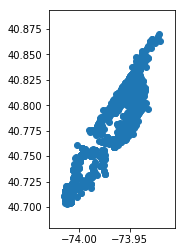

In [122]:
vehicle_pathspd_short_idlegdp.plot()

In [123]:
print(vehicle_pathspd.shape)
# vehicle_pathspd_short['Speed']

(2643431, 8)


(-74.023395929999992,
 -73.905893269999993,
 40.692917915000002,
 40.881598384999997)

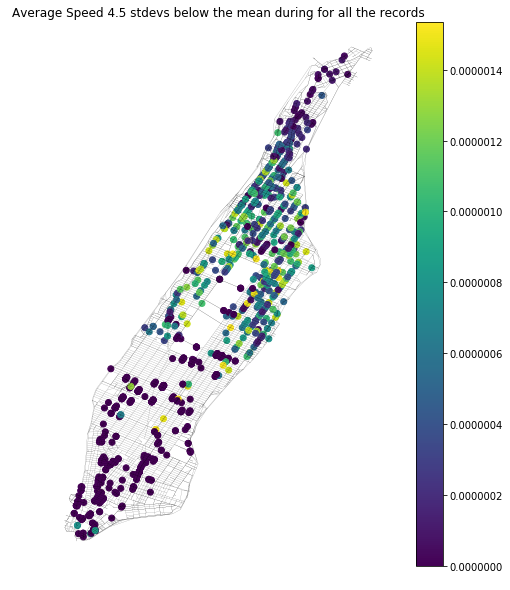

In [137]:
# Manhattan = gpd.GeoDataFrame.from_file('./Manhattan/14000.shp')
# Manhattan.to_crs(epsg=4326, inplace=True)
ax = manhattan.plot(facecolor="w", edgecolor="k",linewidth=0.1,figsize=(10,10))
vehicle_pathspd_short_idlegdp.plot(column='Speed',legend=True, ax=ax)
plt.title('Average Speed 4.5 stdevs below the mean during for all the records')
ax.axis('off')

In [128]:
vehicle_pathspd_short_idlegdp['datetime'] = vehicle_pathspd_short_idlegdp.Timestamp.astype('datetime64[s]')
vehicle_pathspd_short_idlegdp['hour_of_timestamp'] = vehicle_pathspd_short_idlegdp['datetime'].dt.hour
vehicle_pathspd_short_idlegdp_sorted = vehicle_pathspd_short_idlegdp.groupby(by='hour_of_timestamp').mean()

In [130]:
vehicle_pathspd_short_idlegdp.head()

Timestamp  Vehicle_ID                             geometry     Time  \
194813   1380955605         498           POINT (-73.95851 40.80061)   1761.0   
410478   1380970497         498           POINT (-73.94815 40.78968)  14696.0   
1712934  1381011381         498            POINT (-73.9819 40.77826)     87.0   
2155870  1381023539         498           POINT (-73.99343 40.72451)     45.0   
545780   1380976691         497  POINT (-73.93918000000001 40.84322)  17754.0   

         Distance         Speed            datetime  hour_of_timestamp  
194813   0.000529  3.005365e-07 2013-10-05 06:46:45                  6  
410478   0.004008  2.727539e-07 2013-10-05 10:54:57                 10  
1712934  0.000000  0.000000e+00 2013-10-05 22:16:21                 22  
2155870  0.000000  0.000000e+00 2013-10-06 01:38:59                  1  
545780   0.001553  8.745132e-08 2013-10-05 12:38:11                 12

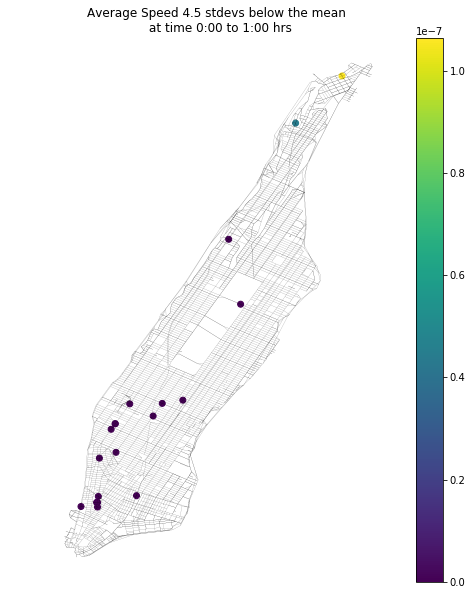

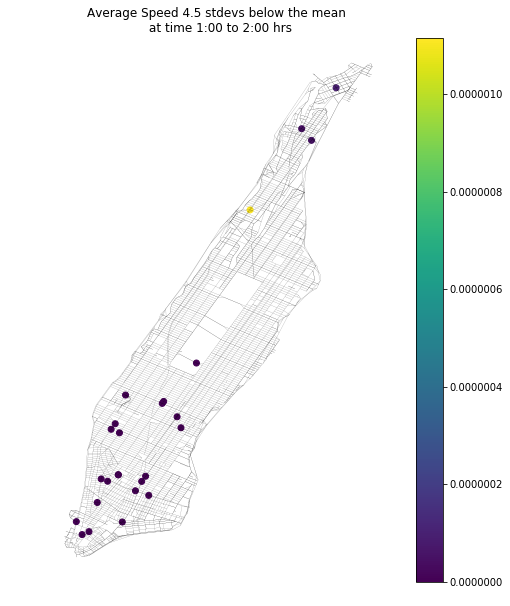

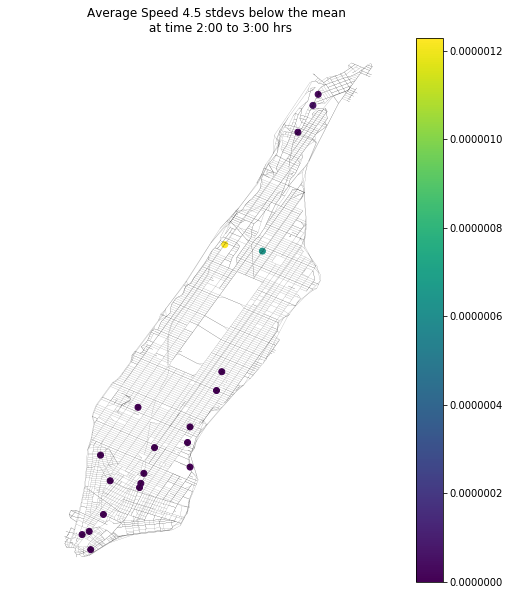

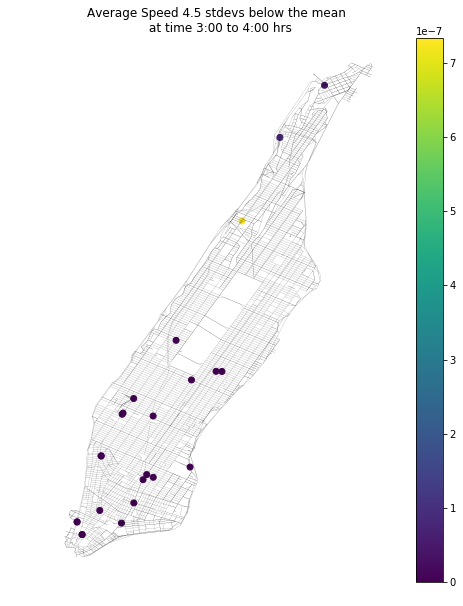

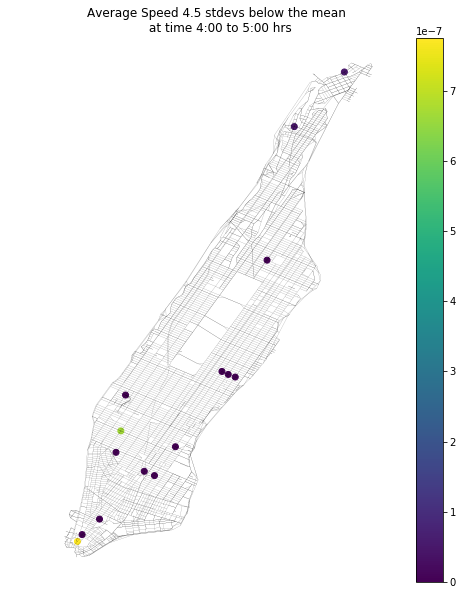

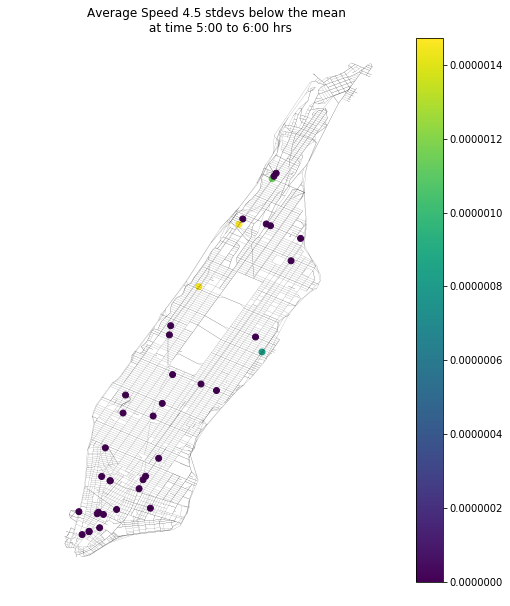

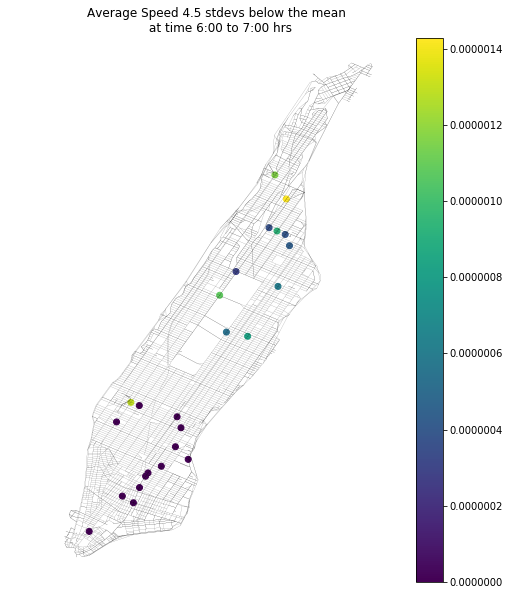

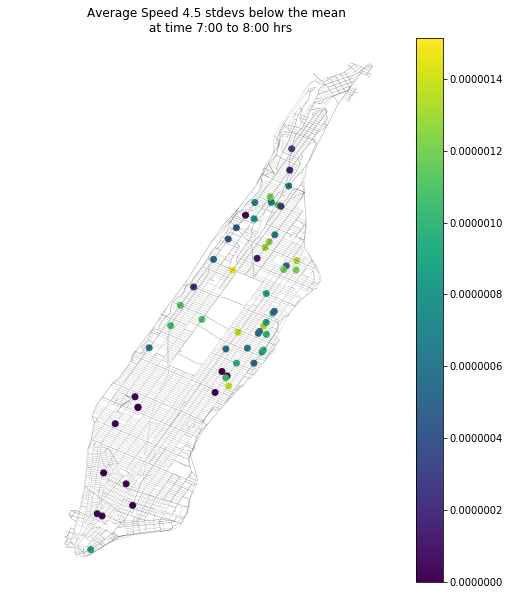

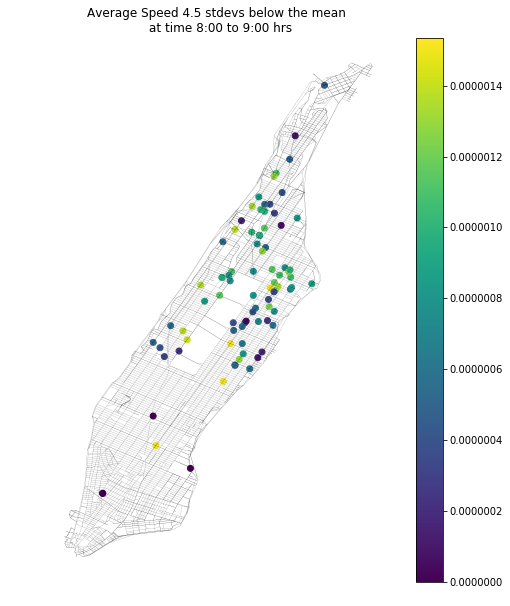

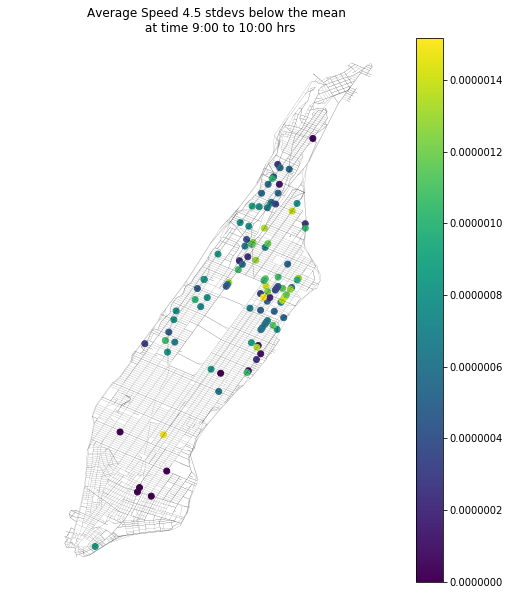

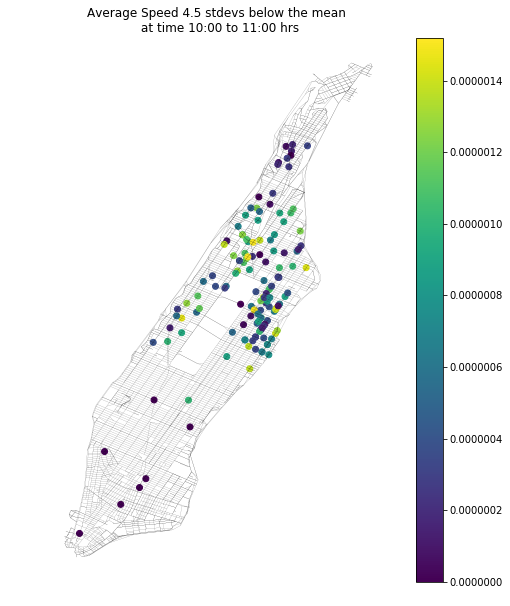

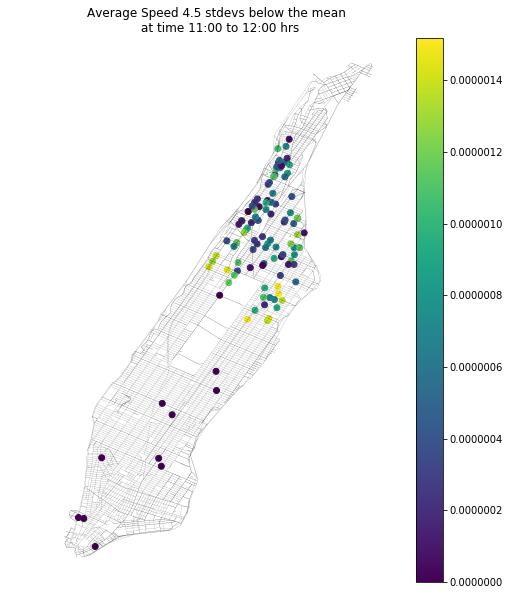

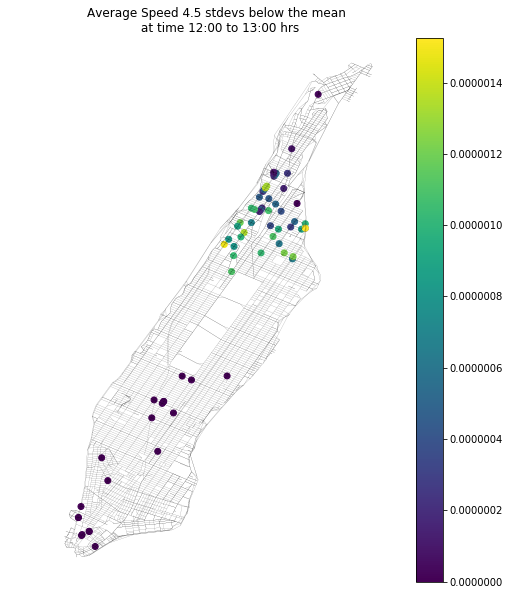

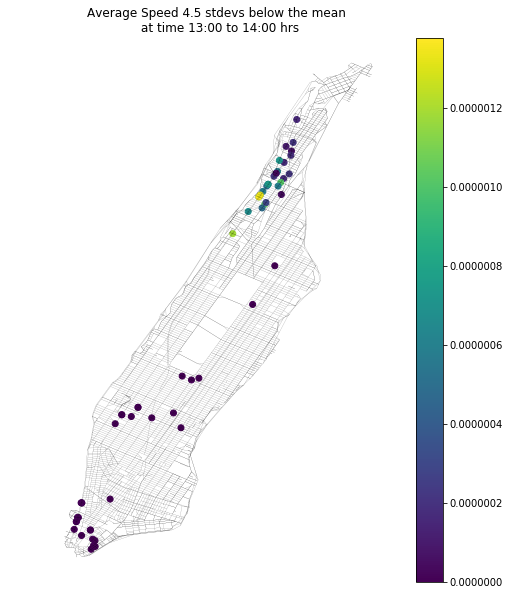

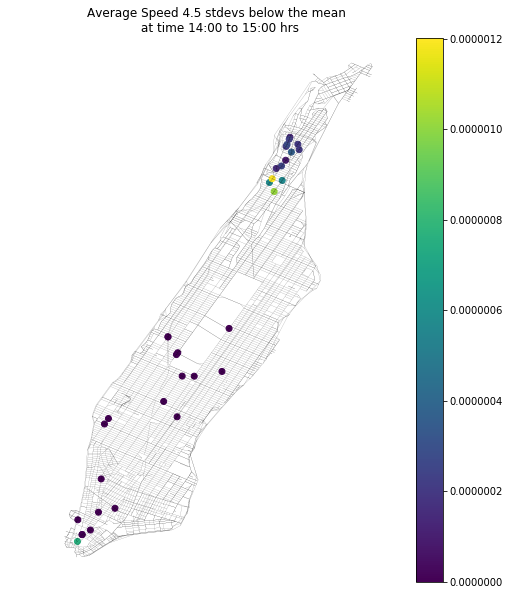

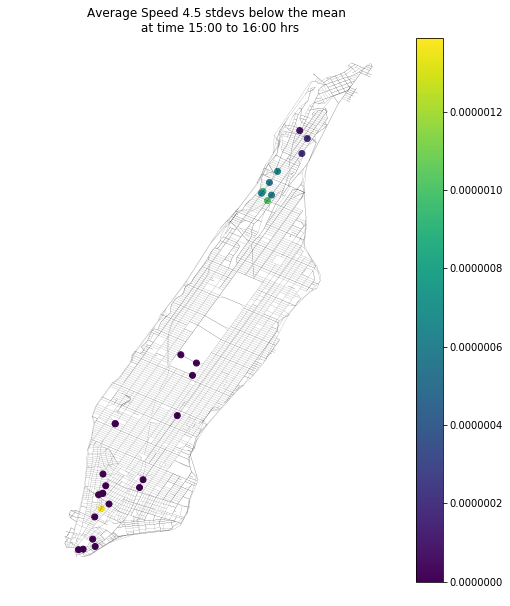

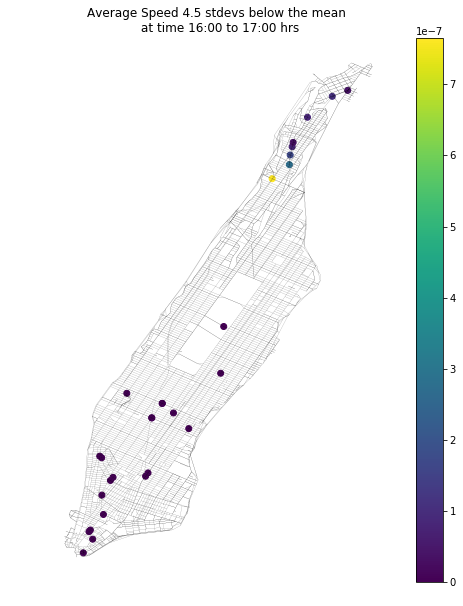

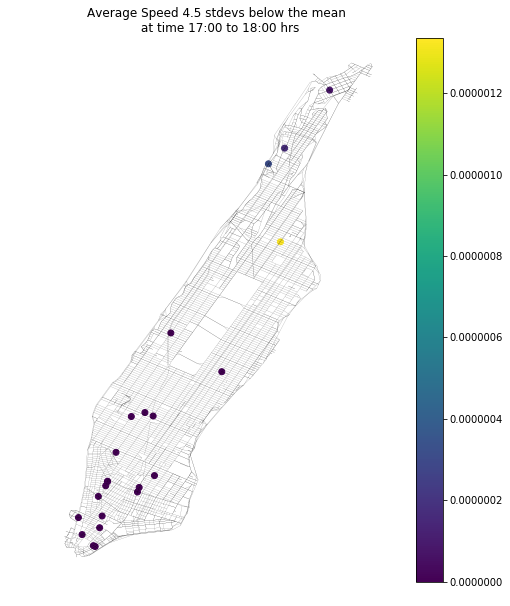

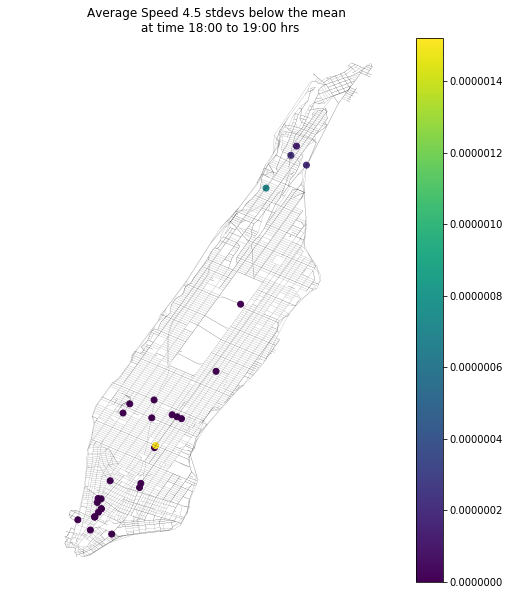

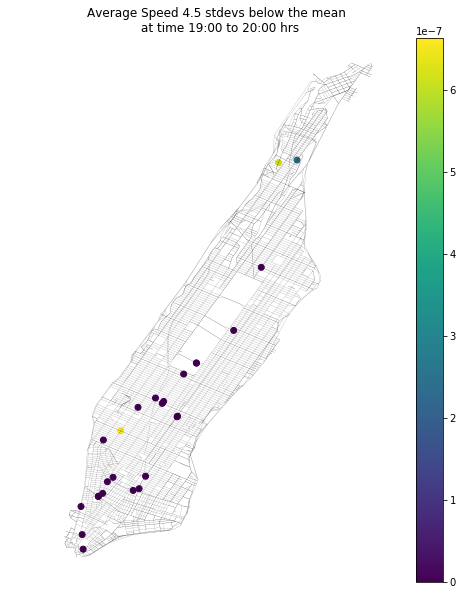

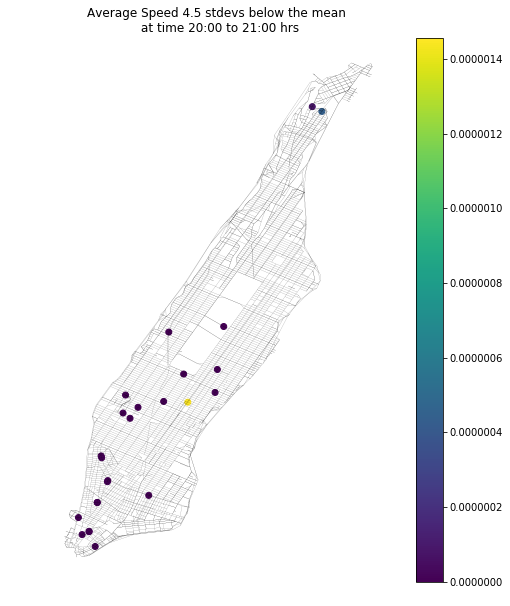

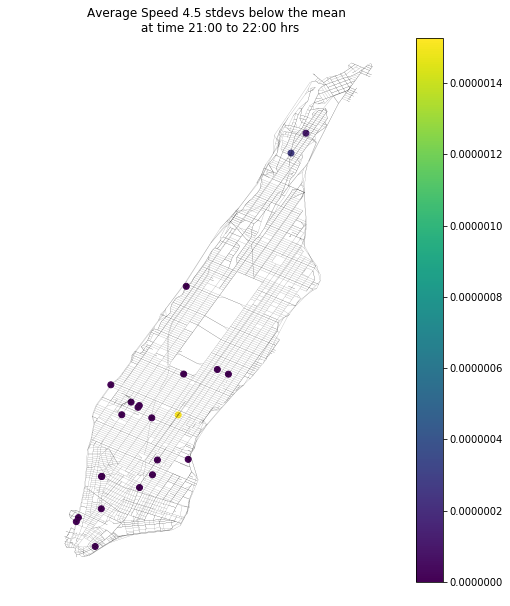

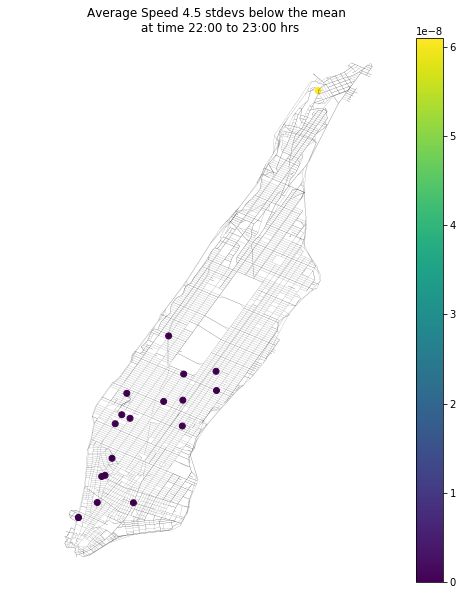

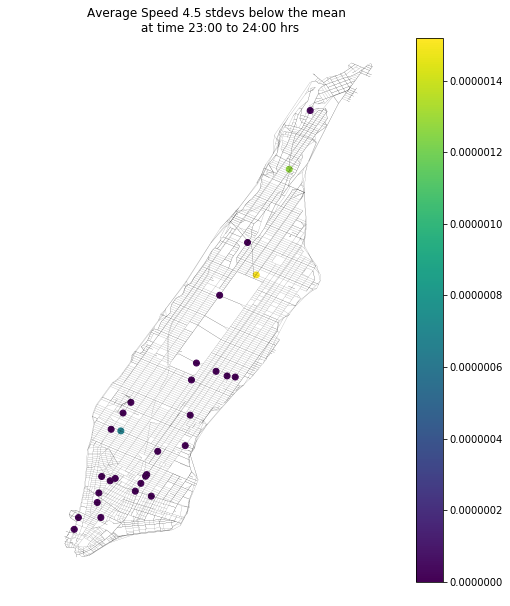

In [136]:
for i in sorted(vehicle_pathspd_short_idlegdp.hour_of_timestamp.unique()):
# Manhattan = gpd.GeoDataFrame.from_file('./Manhattan/14000.shp')
# Manhattan.to_crs(epsg=4326, inplace=True)
    ax = manhattan.plot(facecolor="w", edgecolor="k",linewidth=0.1,figsize=(10,10))
    vehicle_pathspd_short_idlegdp[vehicle_pathspd_short_idlegdp.hour_of_timestamp==i].plot(column='Speed',legend=True, ax=ax)
    plt.title('Average Speed 4.5 stdevs below the mean \n at time '+str(i)+':00 to '+str(i+1)+':00 hrs')
    ax.axis('off')
    plt.show()

7.We  want  to  understand  the  trends  among  vehicles  in  term  distance  travel,  average  number  of passengers,  the  number  of  revenue  trips  (a  pair  of  pickup/dropoff),  the  number  of  rebalance  trips (stops  with  0  passengers  but  positive  duration),  and  idling  time.  How  can  you  help  us  explore  this trends?

# Q8
8.If we are to pick a particular vehicle ID, how can we effectively illustrate its activities throughout the day

In [359]:
vehicle_pathspd['lonlat'] = list(zip(vehicle_pathspd.Longitude, vehicle_pathspd.Latitude))
vehicle_pathspd['geometry'] = vehicle_pathspd[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
vehicle_paths_gdp = gpd.GeoDataFrame(vehicle_pathspd)

In [360]:
vehicle_ID = 83

In [361]:
manhattan.id.unique(), len(vehicle_events_83_gdp.Stop_Intersection.sort_values().unique())

(array([   0,    1,    2, ..., 9622, 9623, 9624]), 534)

In [362]:
vehicle_eventspd[vehicle_eventspd.Vehicle_ID==vehicle_ID].shape, manhattan.shape

((1464, 5), (9625, 3))

In [363]:
# vehicle_events_83_gdp[vehicle_events_83_gdp.hour_of_timestamp == 0]
vehicle_eventspd.shape

(543572, 5)

In [364]:
vehicle_eventspd[vehicle_eventspd.Vehicle_ID==vehicle_ID].merge(manhattan,how='inner',left_on='Stop_Intersection', right_on='id').shape

(1464, 8)

In [365]:
vehicle_events_83_pd = vehicle_eventspd[vehicle_eventspd.Vehicle_ID==vehicle_ID].merge(manhattan,left_on='Stop_Intersection', right_on='id')

In [367]:
len(vehicle_paths_83_gdp_all[vehicle_paths_83_gdp_all.hour_of_timestamp == 0])


299

In [369]:
# vehicle_paths_83_gdp_all[vehicle_paths_83_gdp_all.hour_of_timestamp == 0].plot(column='Speed',linewidth=0.1, color='#F9DA95',legend=True,figsize=(10,10))


In [370]:
# Calculate Hour

In [371]:
vehicle_events_83_gdp['datetime'] = vehicle_events_83_gdp.Timestamp.astype('datetime64[s]')
vehicle_events_83_gdp['hour_of_timestamp'] = vehicle_events_83_gdp['datetime'].dt.hour
vehicle_events_83_gdp = gpd.GeoDataFrame(vehicle_events_83_gdp)
# vehicle_pathspd_short_idlegdp_sorted = vehicle_pathspd_short_83_gpd.groupby(by='hour_of_timestamp').mean()

In [372]:
vehicle_paths_83_gdp_all = vehicle_pathspd[vehicle_pathspd.Vehicle_ID==vehicle_ID]
vehicle_paths_83_gdp_all['datetime'] = vehicle_paths_83_gdp_all.Timestamp.astype('datetime64[s]')
vehicle_paths_83_gdp_all['hour_of_timestamp'] = vehicle_paths_83_gdp_all['datetime'].dt.hour
vehicle_paths_83_gdp_all = gpd.GeoDataFrame(vehicle_paths_83_gdp_all)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [373]:
vehicle_events_83_gdp['geometry'] = vehicle_events_83_gdp.geometry.centroid

In [374]:
vehicle_events_83_gdp.Stop_Passengers.replace({-1:' dropping off',1:' picking up',0:'rebalancing'}, inplace=True)

In [375]:
vehicle_events_83_gdp.hour_of_timestamp.unique()

array([ 5, 17,  6,  3, 11,  4, 13, 16,  0, 18,  2, 21,  7, 14,  1, 20, 10,
       23, 15, 12, 19, 22])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:389: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


(-74.023395929999992,
 -73.905893269999993,
 40.692917915000002,
 40.881598384999997)

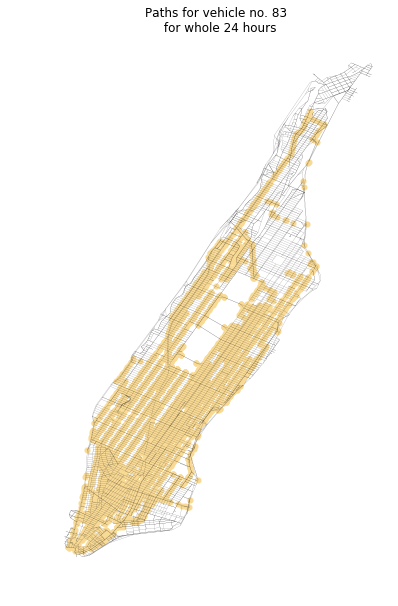

In [381]:
ax = manhattan.plot(facecolor="w", edgecolor="k",linewidth=0.1,figsize=(10,10))
# vehicle_events_83_gdp.plot(column='Stop_Passengers',categorical=True,legend=['Drop','Balanced','Pickup'],figsize=(10,10),ax=ax)
vehicle_paths_83_gdp_all.plot(column='Speed',linewidth=0.1, color='#F9DA95',legend='Route',figsize=(10,10),ax=ax)
plt.title('Paths for vehicle no. 83 \n for whole 24 hours')
ax.axis('off')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:389: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


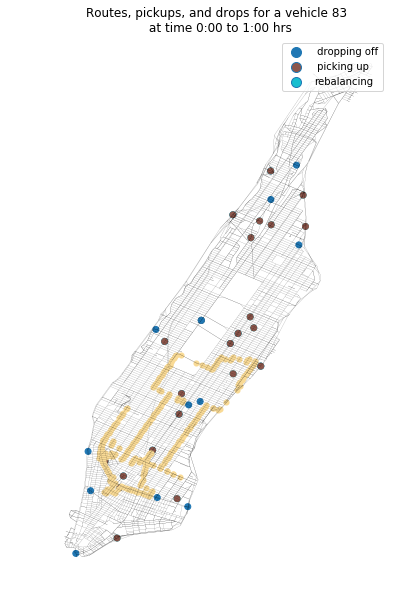

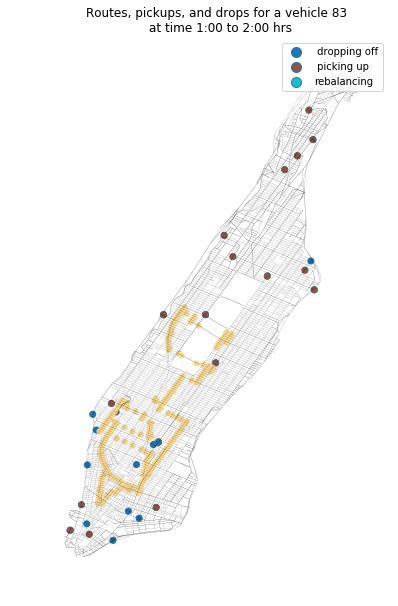

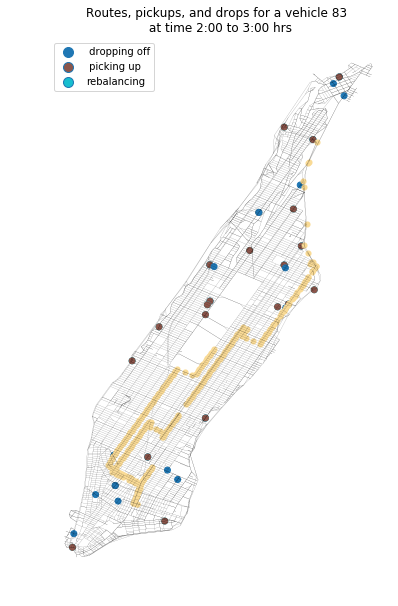

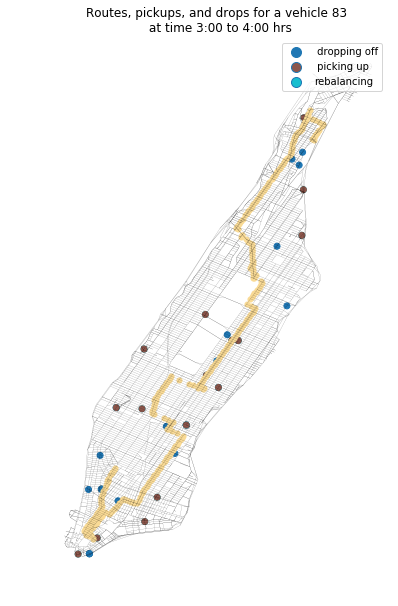

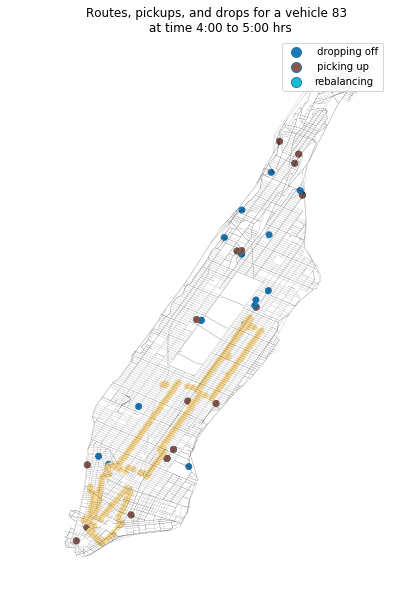

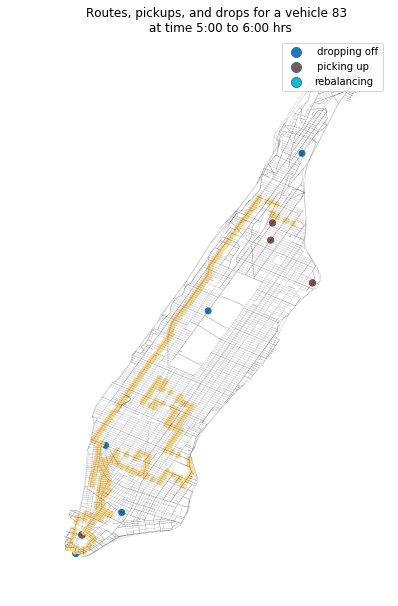

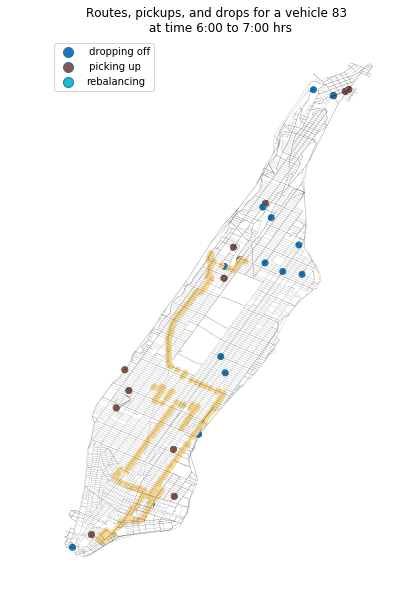

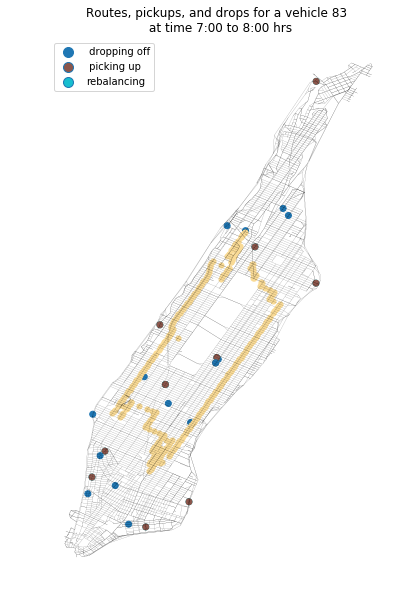

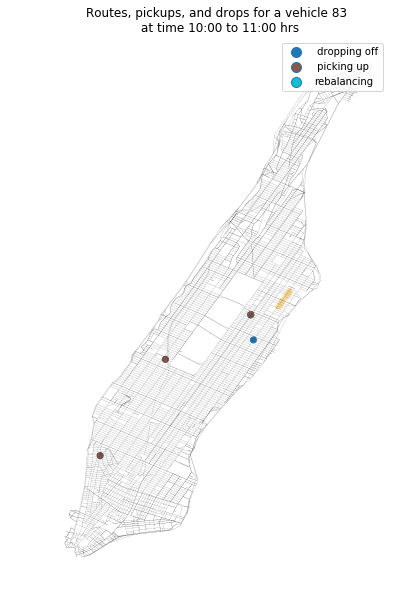

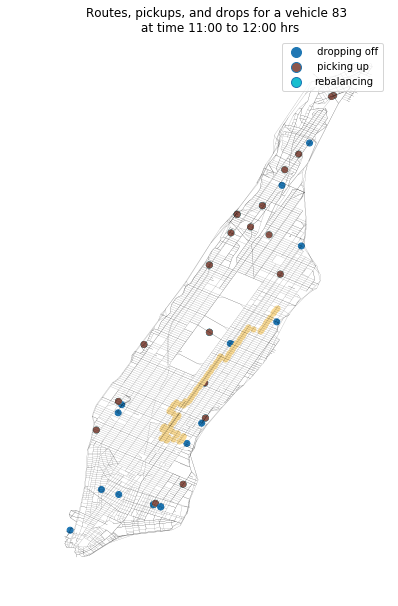

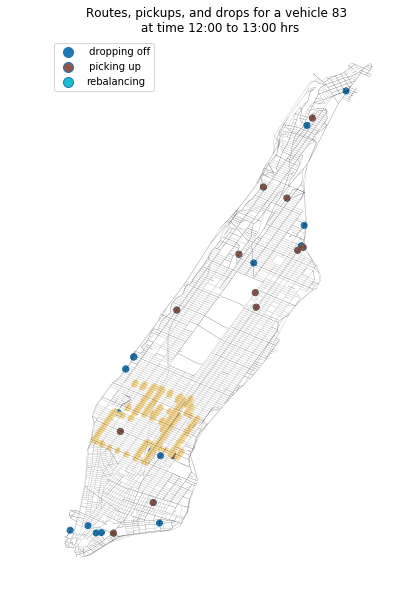

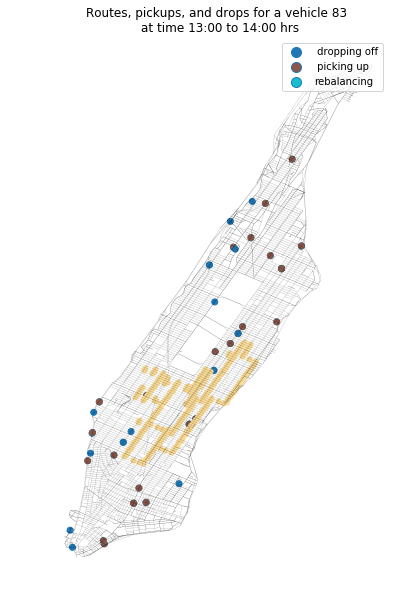

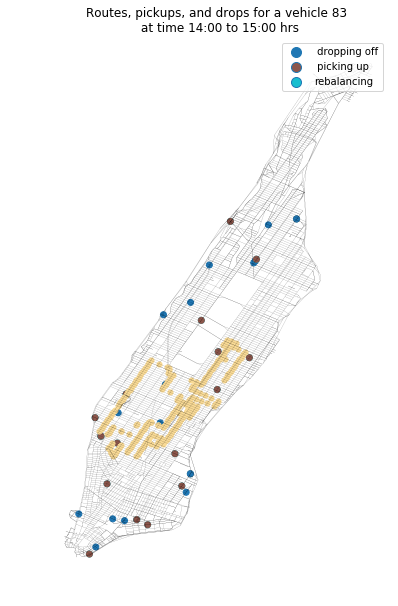

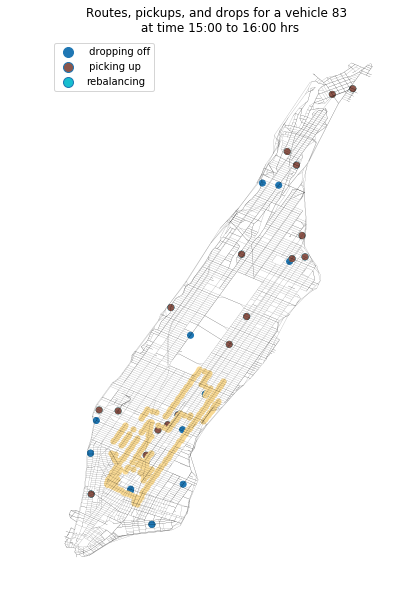

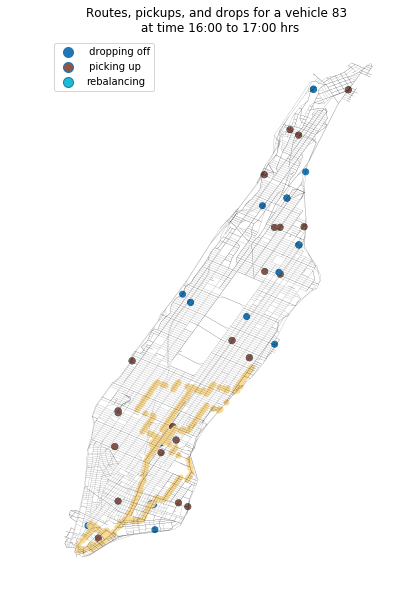

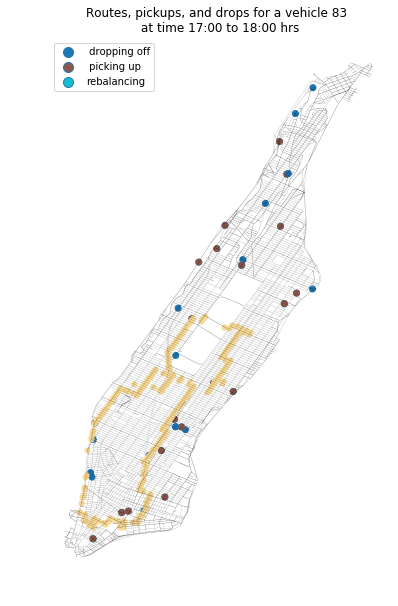

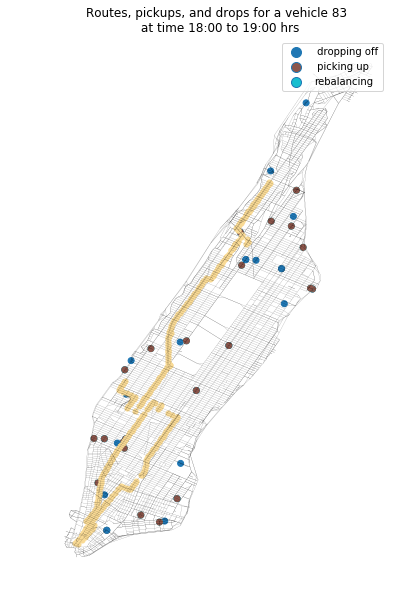

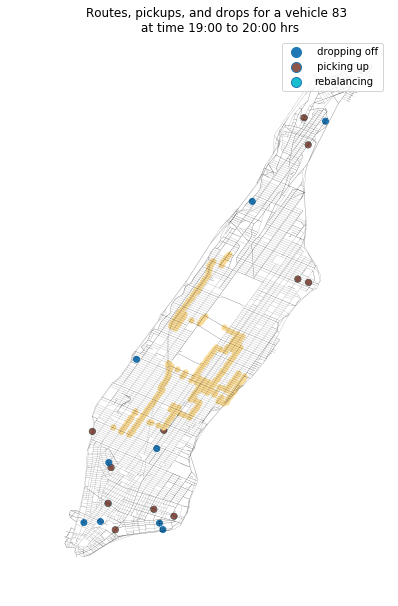

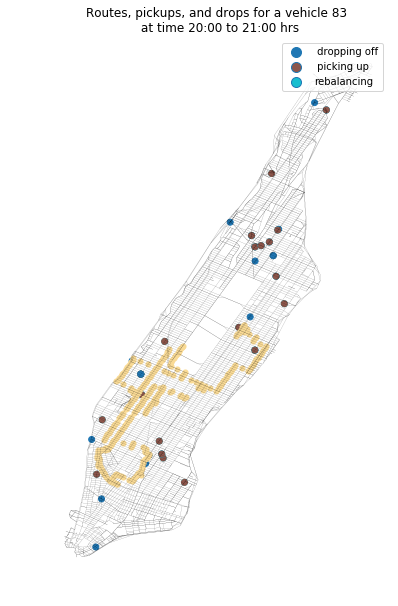

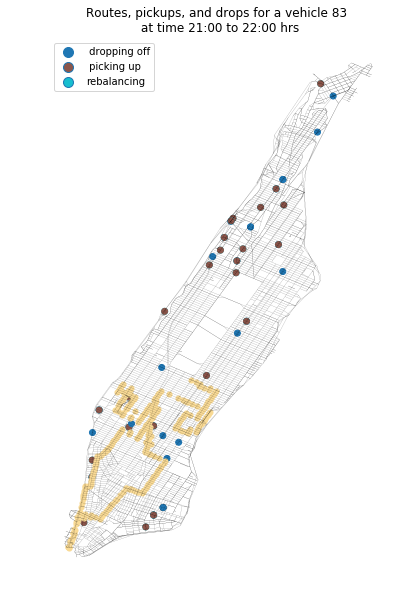

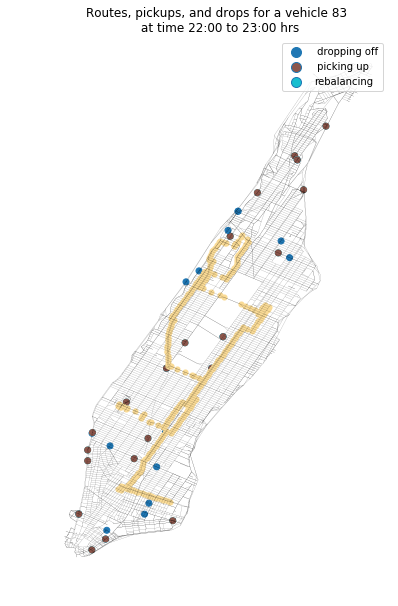

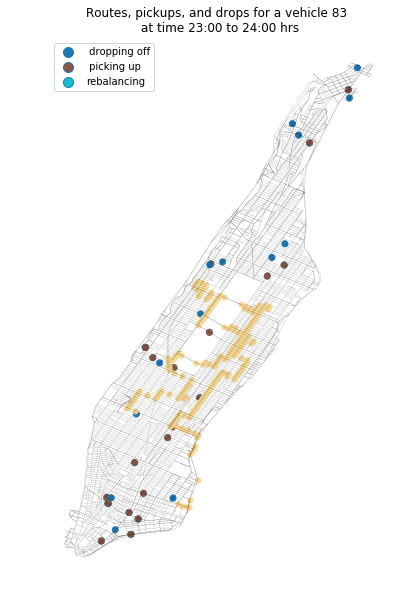

In [377]:
# vehicle_paths_83_gdp_all
for i in sorted(vehicle_events_83_gdp.hour_of_timestamp.unique()):
#     [vehicle_pathspd_short_idlegdp.hour_of_timestamp==i]
    ax = manhattan.plot(facecolor="w", edgecolor="k",linewidth=0.1,figsize=(10,10))
    vehicle_events_83_gdp[vehicle_events_83_gdp.hour_of_timestamp == i].plot(column='Stop_Passengers',categorical=True,legend=['Drop','Balanced','Pickup'],figsize=(10,10),ax=ax)
    vehicle_paths_83_gdp_all[vehicle_paths_83_gdp_all.hour_of_timestamp == i].plot(column='Speed',linewidth=0.1, color='#F9DA95',legend=True,figsize=(10,10),ax=ax)
    plt.title('Routes, pickups, and drops for a vehicle 83 \n at time '+str(i)+':00 to '+str(i+1)+':00 hrs')
    ax.axis('off')

In [347]:
# # Manhattan = gpd.GeoDataFrame.from_file('./Manhattan/14000.shp')
# # Manhattan.to_crs(epsg=4326, inplace=True)
# for i in sorted(vehicle_events_83_gdp.hour_of_timestamp.unique()):
# #     [vehicle_pathspd_short_idlegdp.hour_of_timestamp==i]
#     ax = manhattan.plot(facecolor="w", edgecolor="k",linewidth=0.1,figsize=(10,10))
#     vehicle_events_83_gdp[vehicle_events_83_gdp.hour_of_timestamp == i].plot(column='Stop_Passengers',categorical=True,legend=['Drop','Balanced','Pickup'],figsize=(10,10),ax=ax)
#     vehicle_pathspd_short_83_gpd[vehicle_pathspd_short_83_gpd.hour_of_timestamp == i].plot(column='Speed',linewidth=0.1, color='#F9DA95',legend=True,figsize=(10,10),ax=ax)
#     plt.title('Routes, pickups, and drops for a determined vehicle')
#     ax.axis('off')

In [ ]:
ax = manhattan.plot(facecolor="w", edgecolor="k",linewidth=0.1,figsize=(10,10))
vehicle_events_83_gdp.plot(column='Stop_Passengers',categorical=True,legend=['Drop','Balanced','Pickup'],figsize=(10,10),ax=ax)
vehicle_pathspd_short_83_gpd.plot(column='Speed',linewidth=0.1, color='#F9DA95',legend=True,figsize=(10,10),ax=ax)
plt.title('Routes, pickups, and drops for a determined vehicle')
ax.axis('off')